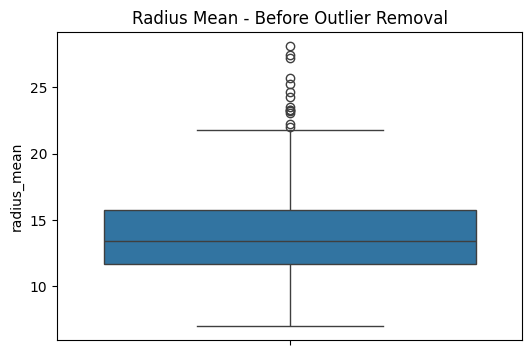

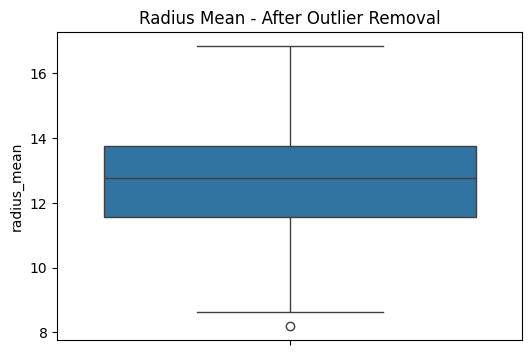

Logistic Regression Accuracy: 0.9643
Naive Bayes Accuracy: 0.8571
Accuracy Difference (LogReg - NaiveBayes): 0.1071


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# ----- a. Load Data -----
df = pd.read_csv('breast-cancer.csv')  # Assuming the file has headers as shown

# ----- b. Data Cleaning -----
# Drop 'id' column
df.drop('id', axis=1, inplace=True)

# Encode 'diagnosis': M → 1 (malignant), B → 0 (benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Check for missing values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Convert all features to numeric (if needed)
features = df.columns.drop('diagnosis')
df[features] = df[features].apply(pd.to_numeric, errors='coerce')
df = df.dropna()

# ----- c. Outlier Detection and Removal -----
# Example: Visualize outliers in 'radius_mean'
plt.figure(figsize=(6, 4))
sns.boxplot(data=df['radius_mean'])
plt.title("Radius Mean - Before Outlier Removal")
plt.show()

# Apply IQR filtering
for col in features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Post-outlier removal boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=df['radius_mean'])
plt.title("Radius Mean - After Outlier Removal")
plt.show()

# ----- d. Data Transformation -----
# Normalize feature values
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# ----- e. Model Building -----
X = df[features]
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
log_acc = accuracy_score(y_test, log_model.predict(X_test))

# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_acc = accuracy_score(y_test, nb_model.predict(X_test))

# ----- f. Results -----
print("Logistic Regression Accuracy:", round(log_acc, 4))
print("Naive Bayes Accuracy:", round(nb_acc, 4))
print("Accuracy Difference (LogReg - NaiveBayes):", round(log_acc - nb_acc, 4))
